# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
# import libraries

import pandas as pd   #used for data manipulation and analysis
import numpy as np    #used for mathematical and logical operations
import matplotlib.pyplot as plt #tool used for creating quick and straightforward visualizations
import seaborn as sns #used for data visualization and EDA. Seaborn works easily with dataframes and the Pandas library

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_all = pd.read_csv('dataset_bank.csv')
data_all.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
data_all.shape

(10127, 21)

In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
target = data_all.Attrition_Flag
target
target = target.replace({'Existing Customer': '0', 'Attrited Customer': '1'})
target

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: object

In [6]:
df = data_all.drop(columns = ['CLIENTNUM','Attrition_Flag'], axis = 1)
df.head(2)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  float64
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  float64
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: flo

In [9]:
df_cat = df.select_dtypes(include = ['object'])
df_cat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           10127 non-null  object
 1   Education_Level  10127 non-null  object
 2   Marital_Status   10127 non-null  object
 3   Income_Category  10127 non-null  object
 4   Card_Category    10127 non-null  object
dtypes: object(5)
memory usage: 395.7+ KB


In [10]:
df_num.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:

a = df_num.Customer_Age.value_counts(bins = 10)
b = df_num.Dependent_count.value_counts()
c = df_num.Months_on_book.value_counts(bins = 10)
d = df_num.Total_Relationship_Count.value_counts()
e = df_num.Months_Inactive_12_mon.value_counts(sort = True, bins = 10)
f = df_num.Contacts_Count_12_mon.value_counts(bins = 10)
g = df_num.Credit_Limit.value_counts(bins = 10)
h = df_num.Total_Revolving_Bal.value_counts(bins = 10)
i = df_num.Avg_Open_To_Buy.value_counts(bins = 10)
j = df_num.Total_Amt_Chng_Q4_Q1.value_counts(bins = 10)
k = df_num.Total_Trans_Amt.value_counts(bins = 10)
l = df_num.Total_Trans_Ct.value_counts(bins = 10)
m = df_num.Total_Ct_Chng_Q4_Q1.value_counts(bins = 10)
n = df_num.Avg_Utilization_Ratio.value_counts(bins = 10)

print(a, b, c, d, e, f, g, h, i, j, k, l, m, n)

(44.8, 49.5]                  2422
(49.5, 54.2]                  1920
(40.1, 44.8]                  1778
(35.4, 40.1]                  1478
(54.2, 58.9]                   921
(30.7, 35.4]                   654
(58.9, 63.6]                   535
(25.951999999999998, 30.7]     265
(63.6, 68.3]                   152
(68.3, 73.0]                     2
Name: Customer_Age, dtype: int64 3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64 (-2470631130.648, 30167264717.7]    10126
(288685251635.3, 321000000000.0]        1
(30167264717.7, 62482013082.4]          0
(62482013082.4, 94796761447.1]          0
(94796761447.1, 127111509811.8]         0
(127111509811.8, 159426258176.5]        0
(159426258176.5, 191741006541.2]        0
(191741006541.2, 224055754905.9]        0
(224055754905.9, 256370503270.6]        0
(256370503270.6, 288685251635.3]        0
Name: Months_on_book, dtype: int64 3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: 

Customer_Age                   AxesSubplot(0.125,0.125;0.0466867x0.755)
Dependent_count             AxesSubplot(0.181024,0.125;0.0466867x0.755)
Months_on_book              AxesSubplot(0.237048,0.125;0.0466867x0.755)
Total_Relationship_Count    AxesSubplot(0.293072,0.125;0.0466867x0.755)
Months_Inactive_12_mon      AxesSubplot(0.349096,0.125;0.0466867x0.755)
Contacts_Count_12_mon        AxesSubplot(0.40512,0.125;0.0466867x0.755)
Credit_Limit                AxesSubplot(0.461145,0.125;0.0466867x0.755)
Total_Revolving_Bal         AxesSubplot(0.517169,0.125;0.0466867x0.755)
Avg_Open_To_Buy             AxesSubplot(0.573193,0.125;0.0466867x0.755)
Total_Amt_Chng_Q4_Q1        AxesSubplot(0.629217,0.125;0.0466867x0.755)
Total_Trans_Amt             AxesSubplot(0.685241,0.125;0.0466867x0.755)
Total_Trans_Ct              AxesSubplot(0.741265,0.125;0.0466867x0.755)
Total_Ct_Chng_Q4_Q1         AxesSubplot(0.797289,0.125;0.0466867x0.755)
Avg_Utilization_Ratio       AxesSubplot(0.853313,0.125;0.0466867

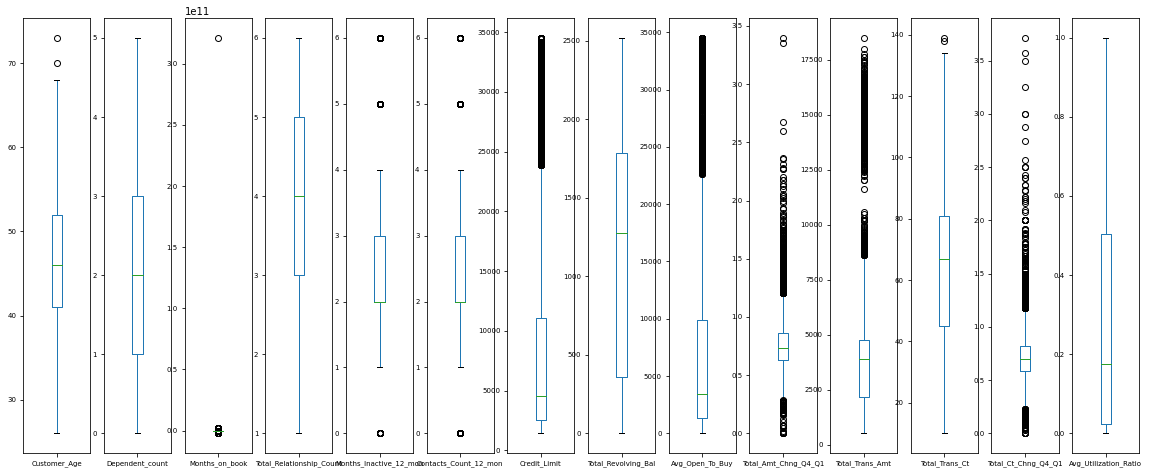

In [12]:
df_num.plot(kind='box',subplots = True, figsize=(20,8), fontsize = 7, sharex = False)

In [13]:
df_num.Months_on_book.max()

321000000000.0

In [14]:
n_bins = 100
m = data_all.Months_on_book.value_counts(bins = n_bins)

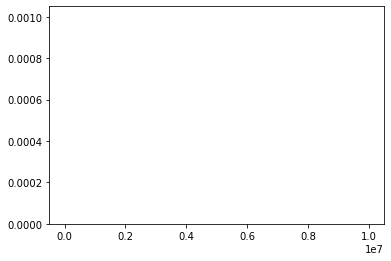

In [15]:
import matplotlib.pyplot as plt

plt.hist(df_num.Months_on_book, bins=[0,1000,10000000], log=False, density=1)
plt.show()

In [16]:
#df_num.Months_on_book.plot.hist(bins = 5, fontsize = 8, density=False, align='right', log=True)
#plt.xscale("log")

In [17]:
mob = df_num.Months_on_book
maxx = mob.max()
minn = mob.min()
print(minn, maxx)

-2147483647.0 321000000000.0


In [18]:
# 12 redici se se so vrednosti pomali od NULA i 40 redici se so vrednosti pogolemi od 56. Niv treba da gi sredime
#list_s = mob[mob<0]  # 12 brojcinja
#list_b = mob[mob>56] # 40 brojcinja
#list_s.count()


In [19]:
mob[mob<0].unique()[0]


-2147483647.0

In [20]:
df_num['Months_on_book']=df_num.Months_on_book.replace({-2147483647.0:np.nan,
                                                       2147483647.0:np.nan,
                                                       3.21000000e+11:np.nan})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, '13.0'),
  Text(1, 0, '14.0'),
  Text(2, 0, '15.0'),
  Text(3, 0, '16.0'),
  Text(4, 0, '17.0'),
  Text(5, 0, '18.0'),
  Text(6, 0, '19.0'),
  Text(7, 0, '20.0'),
  Text(8, 0, '21.0'),
  Text(9, 0, '22.0'),
  Text(10, 0, '23.0'),
  Text(11, 0, '24.0'),
  Text(12, 0, '25.0'),
  Text(13, 0, '26.0'),
  Text(14, 0, '27.0'),
  Text(15, 0, '28.0'),
  Text(16, 0, '29.0'),
  Text(17, 0, '30.0'),
  Text(18, 0, '31.0'),
  Text(19, 0, '32.0'),
  Text(20, 0, '33.0'),
  Text(21, 0, '34.0'),
  Text(22, 0, '35.0'),
  Text(23, 0, '36.0'),
  Text(24, 0, '37.0'),
  Text(25, 0, '38.0'),
  Text(26, 0, '39.0'),
  Text(27, 0, '40.0'),
  Text(28, 0, '41.0'),
  Text(29, 0, '42.0'),
  Text(30, 0, '43.0'),
  Text(31, 0, '44.0'),
  Text(32, 0, '45.0'),
  Text(33, 0, '46.0'),
  Text(34, 0, '47.0'),
  T

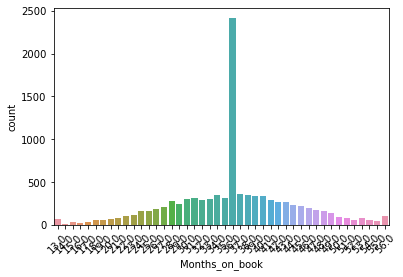

In [21]:
plot=sns.countplot(x='Months_on_book', data=df_num)
plt.xticks(rotation=45)


In [22]:
df_num[df_num['Months_on_book'].isna()]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
326,56,1,NaN,3,2,2,6041.0,1355,4686.0,0.685,1747,49,0.581,0.224
668,53,3,NaN,4,3,2,34516.0,2517,31999.0,0.741,1475,33,0.833,0.073
1077,39,3,NaN,4,2,3,6929.0,1691,5238.0,0.534,1388,27,0.929,0.244
1200,39,3,NaN,6,1,3,3651.0,0,3651.0,0.977,862,19,1.111,0.000
1225,65,0,NaN,3,2,2,2798.0,1806,992.0,0.765,1543,35,0.591,0.645
1939,42,2,NaN,5,3,2,8083.0,0,8083.0,1.076,3942,84,0.750,0.000
2014,39,3,NaN,3,3,2,2503.0,2185,318.0,0.500,4157,58,0.758,0.873
2015,31,0,NaN,4,3,2,3312.0,2491,821.0,0.620,2670,50,0.667,0.752
2016,31,2,NaN,3,2,4,6269.0,1169,5100.0,0.743,2221,57,0.727,0.186
2017,36,4,NaN,3,2,1,20337.0,1605,18732.0,0.805,2460,74,1.312,0.079


In [23]:
import sklearn
from sklearn.impute import SimpleImputer

In [24]:
mob_imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean') # go definirame Simple imputer, stratgegijata
df_num.Months_on_book = mob_imputer.fit_transform(df_num['Months_on_book'].values.reshape(-1,1))[:,0]

<AxesSubplot:ylabel='Frequency'>

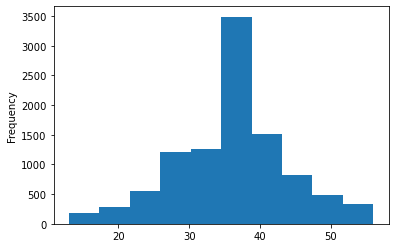

In [25]:
df_num.Months_on_book.value_counts(dropna = True)
df_num.Months_on_book.plot.hist()

In [26]:
df_num.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Customer_Age                   AxesSubplot(0.125,0.125;0.0466867x0.755)
Dependent_count             AxesSubplot(0.181024,0.125;0.0466867x0.755)
Months_on_book              AxesSubplot(0.237048,0.125;0.0466867x0.755)
Total_Relationship_Count    AxesSubplot(0.293072,0.125;0.0466867x0.755)
Months_Inactive_12_mon      AxesSubplot(0.349096,0.125;0.0466867x0.755)
Contacts_Count_12_mon        AxesSubplot(0.40512,0.125;0.0466867x0.755)
Credit_Limit                AxesSubplot(0.461145,0.125;0.0466867x0.755)
Total_Revolving_Bal         AxesSubplot(0.517169,0.125;0.0466867x0.755)
Avg_Open_To_Buy             AxesSubplot(0.573193,0.125;0.0466867x0.755)
Total_Amt_Chng_Q4_Q1        AxesSubplot(0.629217,0.125;0.0466867x0.755)
Total_Trans_Amt             AxesSubplot(0.685241,0.125;0.0466867x0.755)
Total_Trans_Ct              AxesSubplot(0.741265,0.125;0.0466867x0.755)
Total_Ct_Chng_Q4_Q1         AxesSubplot(0.797289,0.125;0.0466867x0.755)
Avg_Utilization_Ratio       AxesSubplot(0.853313,0.125;0.0466867

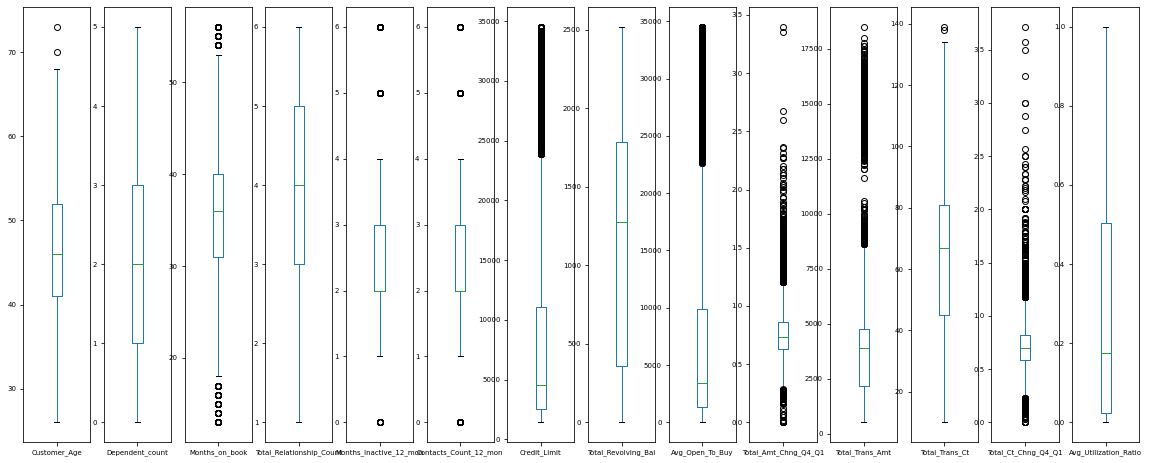

In [27]:
df_num.plot(kind='box',subplots = True, figsize=(20,8), fontsize = 7, sharex = False)

In [28]:
#'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
#       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'

In [29]:
df_num_rs = df_num.copy()
df_num_rs.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler # za varijablite so outleeri

robscal = RobustScaler()


In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler # za varijablite so outleeri

robscal = RobustScaler()
columnsO = ['Months_on_book','Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']
    
df_num_rs[columnsO] = robscal.fit_transform(df_num_rs[columnsO])

Customer_Age                   AxesSubplot(0.125,0.125;0.0466867x0.755)
Dependent_count             AxesSubplot(0.181024,0.125;0.0466867x0.755)
Months_on_book              AxesSubplot(0.237048,0.125;0.0466867x0.755)
Total_Relationship_Count    AxesSubplot(0.293072,0.125;0.0466867x0.755)
Months_Inactive_12_mon      AxesSubplot(0.349096,0.125;0.0466867x0.755)
Contacts_Count_12_mon        AxesSubplot(0.40512,0.125;0.0466867x0.755)
Credit_Limit                AxesSubplot(0.461145,0.125;0.0466867x0.755)
Total_Revolving_Bal         AxesSubplot(0.517169,0.125;0.0466867x0.755)
Avg_Open_To_Buy             AxesSubplot(0.573193,0.125;0.0466867x0.755)
Total_Amt_Chng_Q4_Q1        AxesSubplot(0.629217,0.125;0.0466867x0.755)
Total_Trans_Amt             AxesSubplot(0.685241,0.125;0.0466867x0.755)
Total_Trans_Ct              AxesSubplot(0.741265,0.125;0.0466867x0.755)
Total_Ct_Chng_Q4_Q1         AxesSubplot(0.797289,0.125;0.0466867x0.755)
Avg_Utilization_Ratio       AxesSubplot(0.853313,0.125;0.0466867

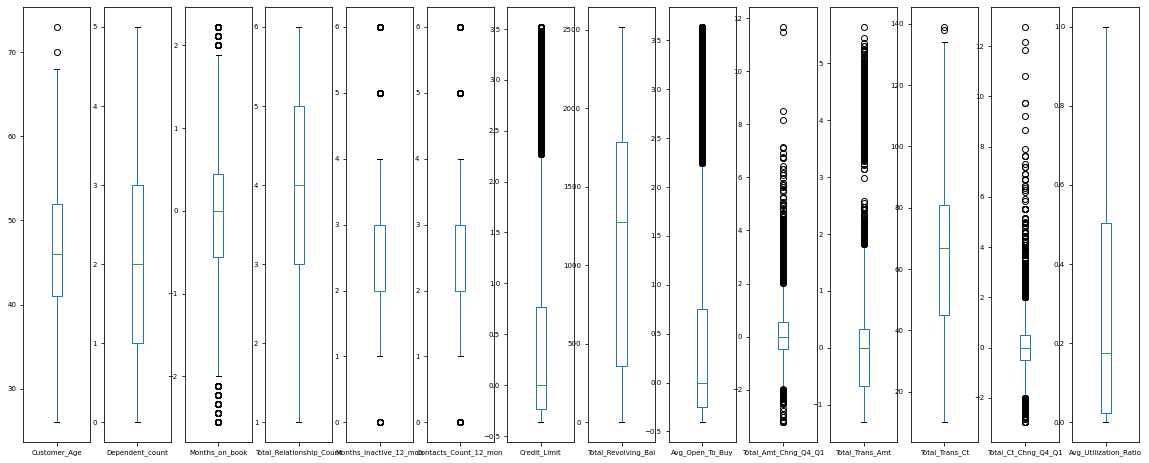

In [32]:
df_num_rs.plot(kind='box',subplots = True, figsize=(20,8), fontsize = 7, sharex = False)

In [33]:
from sklearn.preprocessing import StandardScaler # za varijablite bez outleeri
standscal = StandardScaler()

In [34]:
columnsNO = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
            'Total_Revolving_Bal', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

df_num_rs[columnsNO] = standscal.fit_transform(df_num_rs[columnsNO])

Customer_Age                   AxesSubplot(0.125,0.125;0.0466867x0.755)
Dependent_count             AxesSubplot(0.181024,0.125;0.0466867x0.755)
Months_on_book              AxesSubplot(0.237048,0.125;0.0466867x0.755)
Total_Relationship_Count    AxesSubplot(0.293072,0.125;0.0466867x0.755)
Months_Inactive_12_mon      AxesSubplot(0.349096,0.125;0.0466867x0.755)
Contacts_Count_12_mon        AxesSubplot(0.40512,0.125;0.0466867x0.755)
Credit_Limit                AxesSubplot(0.461145,0.125;0.0466867x0.755)
Total_Revolving_Bal         AxesSubplot(0.517169,0.125;0.0466867x0.755)
Avg_Open_To_Buy             AxesSubplot(0.573193,0.125;0.0466867x0.755)
Total_Amt_Chng_Q4_Q1        AxesSubplot(0.629217,0.125;0.0466867x0.755)
Total_Trans_Amt             AxesSubplot(0.685241,0.125;0.0466867x0.755)
Total_Trans_Ct              AxesSubplot(0.741265,0.125;0.0466867x0.755)
Total_Ct_Chng_Q4_Q1         AxesSubplot(0.797289,0.125;0.0466867x0.755)
Avg_Utilization_Ratio       AxesSubplot(0.853313,0.125;0.0466867

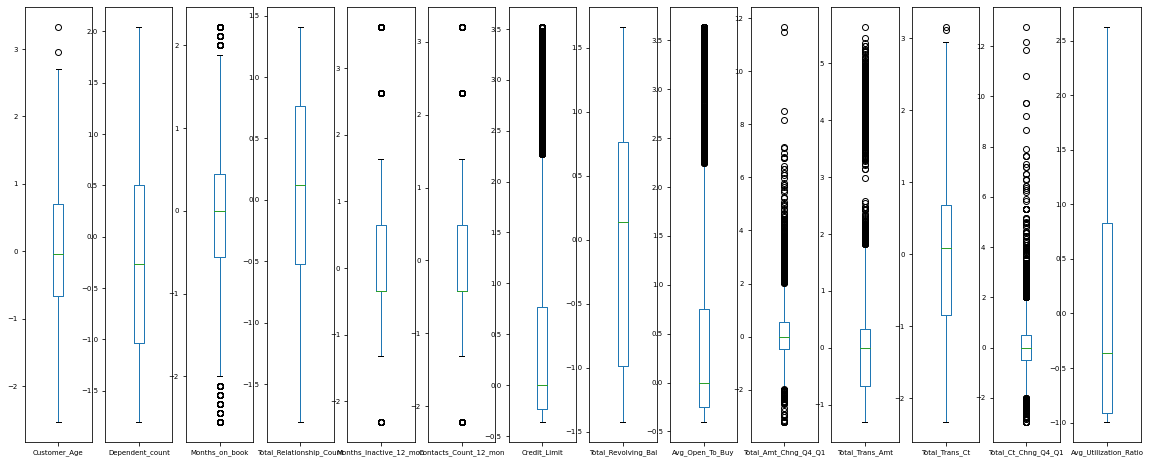

In [35]:
df_num_rs.plot(kind='box',subplots = True, figsize=(20,8), fontsize = 7, sharex = False)

In [36]:
df_cat

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...
10122,M,Graduate,Single,$40K - $60K,Blue
10123,M,Unknown,Divorced,$40K - $60K,Blue
10124,F,High School,Married,Less than $40K,Blue
10125,M,Graduate,Unknown,$40K - $60K,Blue


In [37]:
#df.to_csv("preprocessed_dataset1.csv") od Kiril

### Od tuka pocnuvam jas/  Vuk

### One hot Encoding

In [38]:
hot_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
                'Card_Category']

In [39]:
#One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

transformer2 = OneHotEncoder(sparse=False) #Will return sparse matrix if set True else will return an array

one_hot_encoder = transformer2.fit_transform(df_cat[hot_features])

df_cat = pd.concat([df_cat, pd.DataFrame(one_hot_encoder)], axis='columns')
df_cat

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,0,1,2,3,4,...,13,14,15,16,17,18,19,20,21,22
0,M,High School,Married,$60K - $80K,Blue,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,F,Graduate,Single,Less than $40K,Blue,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,M,Graduate,Married,$80K - $120K,Blue,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,F,High School,Unknown,Less than $40K,Blue,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,M,Uneducated,Married,$60K - $80K,Blue,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,M,Graduate,Single,$40K - $60K,Blue,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,M,Unknown,Divorced,$40K - $60K,Blue,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,F,High School,Married,Less than $40K,Blue,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,M,Graduate,Unknown,$40K - $60K,Blue,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
frames = [df_num_rs, df_cat]  # spojuva koloni

X1 = pd.concat(frames, axis =1)
X1.shape

(10127, 42)

In [41]:
X1.columns

Index([            'Customer_Age',          'Dependent_count',
                 'Months_on_book', 'Total_Relationship_Count',
         'Months_Inactive_12_mon',    'Contacts_Count_12_mon',
                   'Credit_Limit',      'Total_Revolving_Bal',
                'Avg_Open_To_Buy',     'Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt',           'Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1',    'Avg_Utilization_Ratio',
                         'Gender',          'Education_Level',
                 'Marital_Status',          'Income_Category',
                  'Card_Category',                          0,
                                1,                          2,
                                3,                          4,
                                5,                          6,
                                7,                          8,
                                9,                         10,
                               11,                     

In [42]:
#Brisham Vishok kategoriski koloni posle One Hot 
 
X1.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1, inplace=True)

#install.packages("xgboost")], axis=1, inplace=True)

#install.packages("xgboost")

In [43]:
X1.columns

Index([            'Customer_Age',          'Dependent_count',
                 'Months_on_book', 'Total_Relationship_Count',
         'Months_Inactive_12_mon',    'Contacts_Count_12_mon',
                   'Credit_Limit',      'Total_Revolving_Bal',
                'Avg_Open_To_Buy',     'Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt',           'Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1',    'Avg_Utilization_Ratio',
                                0,                          1,
                                2,                          3,
                                4,                          5,
                                6,                          7,
                                8,                          9,
                               10,                         11,
                               12,                         13,
                               14,                         15,
                               16,                     

In [44]:
y1=target.copy()

In [45]:
y1

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: object

## Gradam modeli za klasifikacija 3-4

### One Hot encoding - make the model (Decision Tree)

In [46]:
# train i test 
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [47]:
# se izfrsuva klasifakorot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtOHclass = DecisionTreeClassifier(max_depth =10, random_state = 20) #menuvaj
dtOHclass.fit(X1_train,y1_train)
y_pred_dt = dtOHclass.predict(X1_test)
dtscoreOH = accuracy_score(y1_test, y_pred_dt)
dtscoreOH

0.9368213228035538

#### Dolu pravam metriki za sekoj clasifikator

In [48]:
#Metrika br.1 
from sklearn.metrics import classification_report

print(classification_report(y1_test, y_pred_dt, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.96      0.97      0.96      2543
    izleguva       0.83      0.78      0.80       496

    accuracy                           0.94      3039
   macro avg       0.89      0.87      0.88      3039
weighted avg       0.94      0.94      0.94      3039



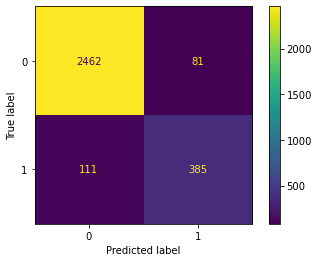

In [49]:
#Metrika br.2
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtOHclass, X1_test, y1_test)

In [50]:
#Ovie metriki gi izvrshuvash vo posebni kjelii
# Ne stiskaj ENTER na site oddednash
target.value_counts(normalize = True)
y1_test.value_counts(normalize= True)
y1_train.value_counts(normalize= True)
sum(target == '0')/len(target)
dtOHclass.score(X1_train, y1_train)

0.9929458239277652

In [51]:
# pomosh #1 da vidime procentualna distribucija vo target varijablata Attrition_Flag
target.value_counts(normalize = True)

0    0.83934
1    0.16066
Name: Attrition_Flag, dtype: float64

In [52]:
# pomosh #2 da vidime procentualna distribucija vo target varijablata Attrition_Flag
y1_test.value_counts(normalize= True)

0    0.836788
1    0.163212
Name: Attrition_Flag, dtype: float64

In [53]:
# pomosh #3 da vidime procentualna distribucija vo target varijablata Attrition_Flag
y1_train.value_counts(normalize= True)

0    0.840435
1    0.159565
Name: Attrition_Flag, dtype: float64

In [54]:
# pomosh #4 da vidime procentualna distribucija vo target varijablata Attrition_Flag
sum(target == '0')/len(target)

0.8393403772094401

In [55]:
#Metrika br.3
dtOHclass.score(X1_train, y1_train)

0.9929458239277652

### One Hot encoding - make the model (Random Forest)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfOH = RandomForestClassifier(random_state = 42)
rfOH.fit(X1_train,y1_train)
y_pred_rf = rfOH.predict(X1_test)
rfOHscore = accuracy_score(y1_test, y_pred_rf)
rfOHscore

0.9506416584402764

In [57]:
# metrika #1
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred_rf, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.95      0.99      0.97      2543
    izleguva       0.93      0.75      0.83       496

    accuracy                           0.95      3039
   macro avg       0.94      0.87      0.90      3039
weighted avg       0.95      0.95      0.95      3039



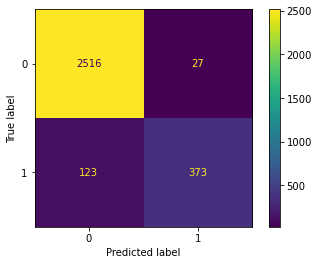

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfOH, X1_test, y1_test)

In [59]:
rfOH.score(X1_train, y1_train)

1.0

### On Hot coding - make the model (KNN)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X1_train, y1_train)
    y_pred_kn = neigh.predict(X1_test)
    score = accuracy_score(y1_test, y_pred_kn)
    scores.append(score)

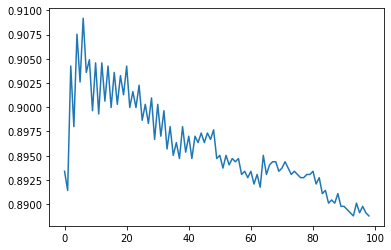

In [61]:
# Tuka gledam kolku sosedi da odberam
fig, ax = plt.subplots()

ax.plot(scores)
plt.show()

In [62]:
knnOH=KNeighborsClassifier(n_neighbors = 7)
knnOH.fit(X1_train, y1_train)
y_pred_knn  = knnOH.predict(X1_test)
knnOHscore = accuracy_score(y1_test, y_pred_knn)
knnOHscore

0.9091806515301086

In [63]:
#from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred_knn, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.92      0.98      0.95      2543
    izleguva       0.84      0.55      0.66       496

    accuracy                           0.91      3039
   macro avg       0.88      0.76      0.81      3039
weighted avg       0.90      0.91      0.90      3039



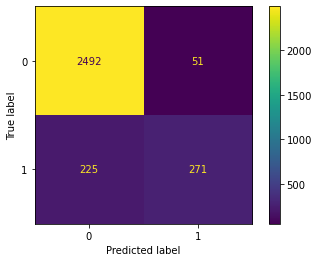

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knnOH, X1_test, y1_test)

In [80]:
knnOH.score(X1_train, y1_train)

0.9297404063205418

## xgboost

In [95]:
import xgboost as xgb
from xgboost import XGBClassifier
# read in data
# dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
# dtest = xgb.DMatrix('demo/data/agaricus.txt.test')

dtrain = xgb.DMatrix(X1_train, label=y1_train)
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
#preds = bst.predict(dtest)

[20:09:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [96]:
#fit model no training data
model = XGBClassifier()
model.fit(X1_train, y1_train)

[20:09:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
# make predictions for test data
y_pred_xg = model.predict(X1_test)

In [84]:
#evaluate predictions
accuracy = accuracy_score(y1_test, y_pred_xg)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.71%


In [85]:
#from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred_xg, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.98      0.98      0.98      2543
    izleguva       0.91      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039



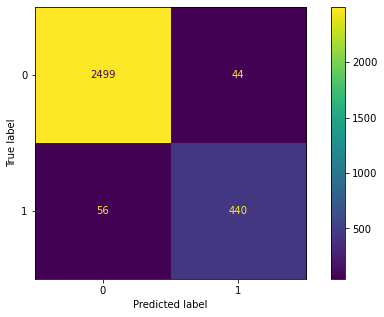

In [86]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X1_test, y1_test)

In [87]:
model.score(X1_train, y1_train)

1.0

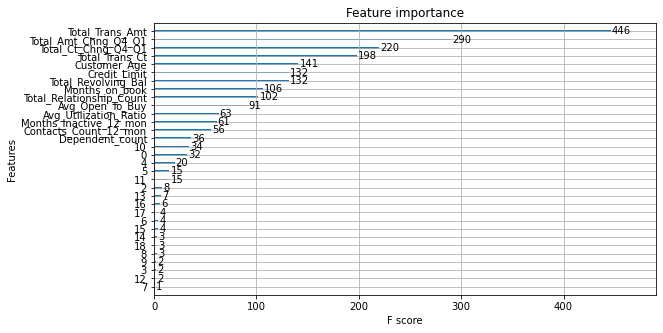

In [88]:
# evaluate feature importance
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [9, 5]
plt.show()

### Grid Search Hyperparametar search na XGboost

In [98]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
np.random.seed(seed=1)

# We will use Cross validation to optimize parameters
import warnings
warnings.filterwarnings('ignore')

#10-fold Cross validaiton - ALL Model - All scores
#scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

#Play with the parameters and choose the best
from sklearn.model_selection import GridSearchCV

# make the grid of the parameters
kf = KFold(n_splits=5, shuffle=True)
print(type(kf))
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#create the GridSearch model and train it
model_xgb = GridSearchCV(estimator = model, 
                     param_grid = params,
                     scoring = 'roc_auc',
                     cv = kf,
                     verbose = 5,
                    n_jobs = -1
                    )
model_xgb.fit(X1_train, y1_train)  

<class 'sklearn.model_selection._split.KFold'>
Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 13.8min finished


[20:26:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constrai...
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_metho

In [110]:
model_final_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
model_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'max_depth': 4,
 'min_child_weight': 1,
 'subsample': 1.0}

In [112]:
best_model_paramter_tunning = model_xgb.best_estimator_

In [100]:
print("Best model: ", model_xgb.best_estimator_)
print("Best Parameters: ", model_xgb.best_params_)
print("Best score ", model_xgb.best_score_ * 100)
print("Best score ", pd.DataFrame.from_dict(model_xgb.cv_results_))

Best model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)
Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
Best score  99.30592849630796
Best score       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         2.385113      0.042477         0.015021        0.001634   
1         2.381502      0.052518         0.013499        0.000968   
2         2.312017      0.019881   

In [103]:
model_final_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
                                importance_type='gain', interaction_constraints='',
                                learning_rate=0.300000012, max_delta_step=0, max_depth=4,
                                min_child_weight=1, monotone_constraints='()',
                                n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
                                tree_method='exact', validate_parameters=1, verbosity=None)
model_final_xgb.fit(X1_train, y1_train)

[20:39:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
y_pred_xg_3_Noemvri = model_final_xgb.predict(X1_test)

In [115]:
#evaluate predictions
accuracy = accuracy_score(y1_test, y_pred_xg_3_Noemvri)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.71%


In [116]:
#from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred_xg_3_Noemvri, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.98      0.98      0.98      2543
    izleguva       0.90      0.89      0.90       496

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039



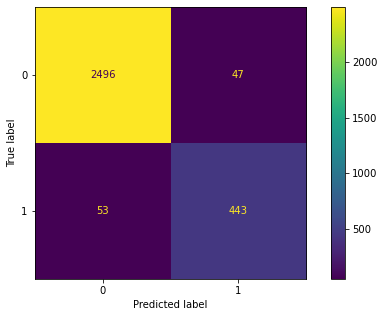

In [118]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_final_xgb, X1_test, y1_test)

In [91]:
# Ova e od cas W6 cas3
# Get the best model and evaluate it on the Test data
y_pred = model.best_estimator_.predict(X_test)

#create (Dummy regressor) tuka mislam deka treba XGB boost
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_dummy = dummy_regr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae3 = mean_absolute_error(y_test, y_dummy)
mse3 = mean_squared_error(y_test, y_dummy)
rmse3 = np.sqrt(mean_squared_error(y_test, y_dummy))
r23 = r2_score(y_test, y_dummy)


#construct the comparison table
data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'RF_Hyper_Grid': [mae,mse,rmse,r2],
        'Dummy': [mae3,mse3,rmse3,r23],
        }

comparison = pd.DataFrame (data, columns = ['Metric','RF_Hyper_Grid', 'Dummy'])
comparison

NameError: name 'X_test' is not defined

## za sreda za na cas
### Da zavrsham so XGBoost future selection i ROC i sVe 
### Target encoding

## grid search Petar / Jas

### ROC kriva

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
plot_xboost = plot_roc_curve(model_new, XGB_test,  y1_test, ax=ax)
ax = plt.gca()
plot_fs = plot_roc_curve(model_FS, X1_new_test, y1_test, ax=ax)
plt.show()

In [ ]:
# za snimanje na objekt/fajl
import pickle
a = [1,2,3,4,5,6,7]
filename = 'array.brainster'
pickle.dump(a, open(filename, 'wb'))

In [ ]:
# za citanej an objekt fajl
niza = pickle.load(open(filename, 'rb'))
print(niza)

In [ ]:
filename = 'model.sklearn'
pickle.dump(model_FS, open(filename, 'wb'))

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

## Tuka mozam da probam da dropnam futeri koi najmalku ucestvuvaat  (XGBoost)

In [ ]:
#Kreira train mnozestvo so dropnati koloni
XGB_train = X1_train.drop(columns = (['Dependent_count','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Avg_Open_To_Buy']), axis = 1)

In [ ]:
#Kreira test mnozestvo so dropnati koloni
XGB_test = X1_test.drop(columns = (['Dependent_count','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Avg_Open_To_Buy']), axis = 1)

In [ ]:
# smina DataFrame
#df.to_csv("preprocessed_dataset1.csv")

In [ ]:
#df_num.plot(kind='hist',subplots = True, figsize=(20,8), fontsize = 7)

In [ ]:
bst.save_model('xgboost.model')

#### Target encoding

## 1. Data preprocessing, normalization, missing data, categorical data

## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

## 3. Classification models
- classical classification models
- deep neural networks

## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect